<h1>Ensemble Methods for Trees and Voting Classifier with Logistic/KNN 

Dataset: Breast Cancer UCI machine learning: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Notebook Editor: Lorik Berisha

Sources: Datacamp tutorials

Purpose: Prove that Ensemble methods work better than traditional algorithms

Disclaimer: **At voting classifier, even that logistic regression and KNN were used, there was no normalization/standardization active for the sake of comparison

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('breast_cancer.csv',sep = '|')

In [3]:
df.loc[df.CLASS == 1 ,'CLASS'] = 0
df.loc[df.CLASS == 2 ,'CLASS'] = 1

In [4]:
df.head(10)

,clump,uniformitycellsize,uniformitycellshape,marginaladhesion,singleepithelialcellsize,blandchromatin,normalnucleoli,mitoses,CLASS
0,5,1,1,1,2,3,1,1,0
1,5,4,4,5,7,3,2,1,0
2,3,1,1,1,2,3,1,1,0
3,6,8,8,1,3,3,7,1,0
4,4,1,1,3,2,3,1,1,0
5,8,10,10,8,7,9,7,1,1
6,1,1,1,1,2,3,1,1,0
7,2,1,2,1,2,3,1,1,0
8,2,1,1,1,2,1,1,5,0
9,4,2,1,1,2,2,1,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   clump                     699 non-null    int64
 1   uniformitycellsize        699 non-null    int64
 2   uniformitycellshape       699 non-null    int64
 3   marginaladhesion          699 non-null    int64
 4   singleepithelialcellsize  699 non-null    int64
 5   blandchromatin            699 non-null    int64
 6   normalnucleoli            699 non-null    int64
 7   mitoses                   699 non-null    int64
 8   CLASS                     699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB


In [6]:
x = df.iloc[:, :-1] #all columns except the last one
y = df.iloc[:, -1] #the last column

In [7]:
SEED = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = SEED)

# DecisionTree - 90.05% Accuracy

In [8]:
decisiontree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = SEED)

In [9]:
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [10]:
y_pred = decisiontree.predict(x_test)

In [11]:
accuracy_dt = accuracy_score(y_test,y_pred)

In [13]:
print('Accuracy of decision tree: {:.3f}'.format(accuracy_dt))

Accuracy of decision tree: 0.905


# GridSearchCV for Hyperparameter Optimization - Decision Tree - 94.67%

In [14]:
decisiontree = DecisionTreeClassifier(random_state = SEED)

In [15]:
decisiontree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [16]:
from sklearn.model_selection import GridSearchCV
params_dt = {
    'max_depth' : [3,4,5,6,7,8,9,10],
    'min_samples_leaf' : [0.04,0.06,0.08,0.16,0.24,0.27,0.30],
    'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
}

grid_dt = GridSearchCV(estimator=decisiontree,
                      param_grid = params_dt,
                      scoring = 'accuracy',
                      cv = 10,
                      n_jobs = -1)

In [17]:
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0

In [18]:
best_hyperparameters = grid_dt.best_params_
print('Best Hyperparameters:\n', best_hyperparameters)

Best Hyperparameters:
 {'max_depth': 3, 'max_features': 0.3, 'min_samples_leaf': 0.04}


In [19]:
best_CV_score = grid_dt.best_score_

<h3>Here it can be observed that after parameter optimization, the accuracy of the model increased by 4.6% </h3>

In [20]:
best_CV_score

0.9467687074829932

In [21]:
best_model = grid_dt.best_estimator_

In [22]:
accuracy_best_model = best_model.score(x_test,y_test)

In [23]:
accuracy_best_model

0.9285714285714286

# Random Forrests - 94.76%

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 0.12, random_state = SEED)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred)

In [25]:
accuracy_rf

0.9476190476190476

<h3>Random Forests support feature importance, in this case uniformitycellsize attribute shows to be the most effective one to classify a malignant or benign cancer based on 400 trees</h3>

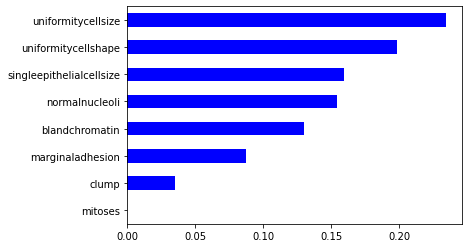

In [26]:
importances_rf = pd.Series(rf.feature_importances_, index = x.columns)
sorted_importances_rf = importances_rf.sort_values()

sorted_importances_rf.plot(kind = 'barh', color = 'blue')
plt.show()

# Gradient Boosting - 94.28%

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
grdboost = GradientBoostingClassifier(n_estimators = 300, max_depth = 1, random_state = SEED)
grdboost.fit(x_train,y_train)
y_pred = grdboost.predict(x_test)
accuracy_gradient = accuracy_score(y_test,y_pred)

In [28]:
accuracy_gradient

0.9428571428571428

# Voting Classifier - 94.28%

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression(random_state = SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state = SEED)

In [31]:
classifiers = [
    ('LogisticRegression',lr),
    ('KNN', knn),
    ('DecisionTree',dt)
]

In [34]:
for classifier_name, classifier in classifiers:
    classifier.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    print('{:s} : {:.3f}'.format(classifier_name, accuracy_score(y_test,y_predicted)))

LogisticRegression : 0.948
KNN : 0.943
DecisionTree : 0.929


In [35]:
voting = VotingClassifier(estimators = classifiers)
voting.fit(x_train,y_train)
y_pred_voting = voting.predict(x_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)

In [36]:
voting_accuracy

0.9428571428571428

# Recap

<h3>Based on the graphs below the best ensemble method for our use case to classify a malignant or benign breast cancer, Random Forest proved to be the most effective. Using ensemble methods or hyperparameter optimization, it is proven that the accuracy might increase. In our case increased for =~ 4%</h3>

Text(0.5, 0.98, 'Accuracy Scores for each ensemble Learning Method')

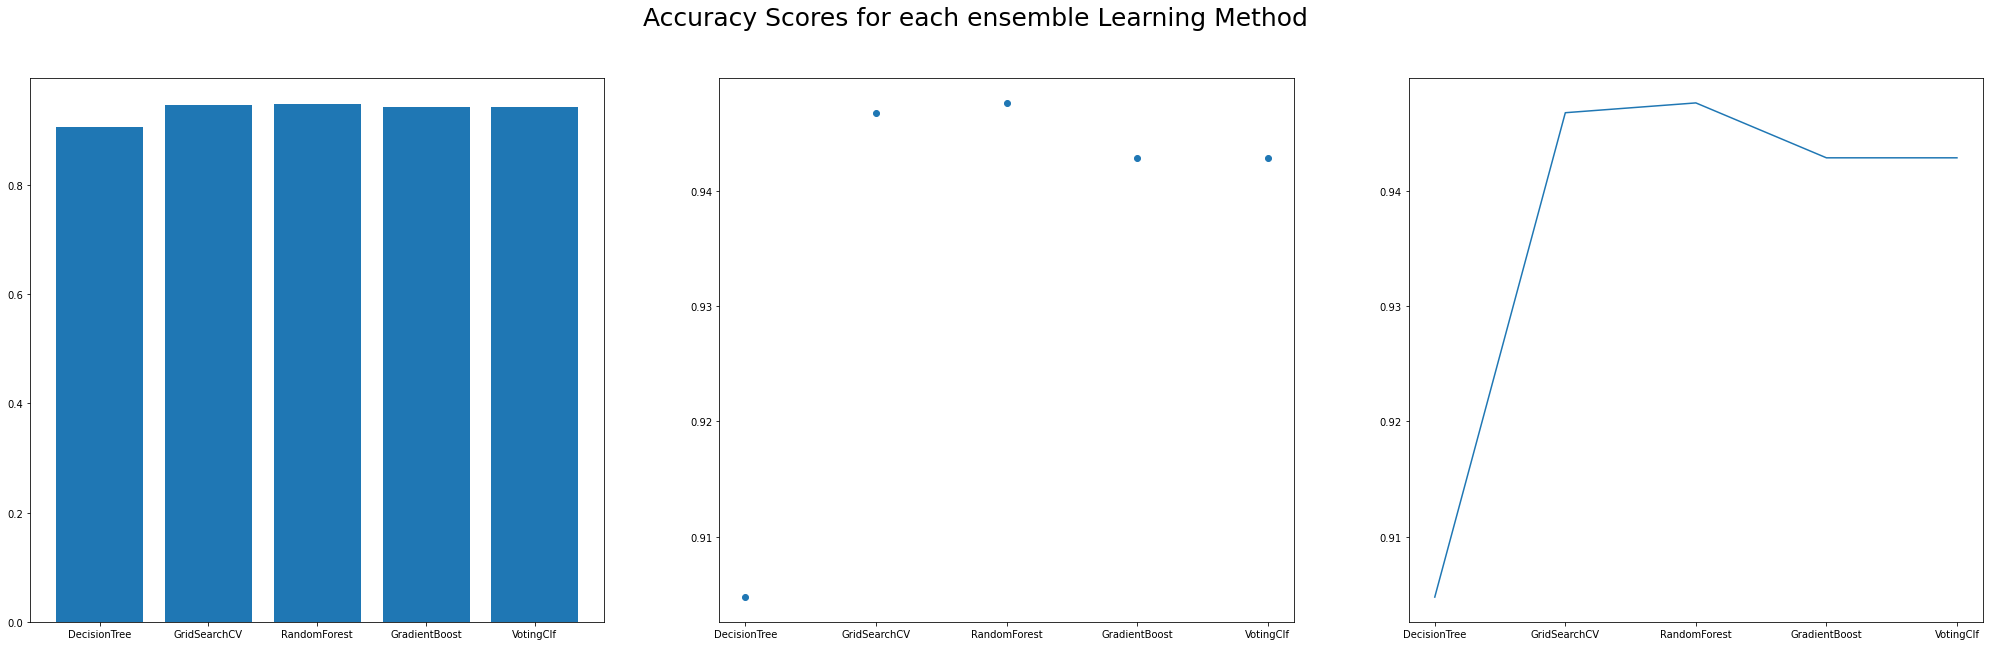

In [55]:
data = {'DecisionTree': accuracy_dt, 'GridSearchCV': best_CV_score, 'RandomForest': accuracy_rf, 'GradientBoost': accuracy_gradient, 'VotingClf' : voting_accuracy}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(35, 10))
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Accuracy Scores for each ensemble Learning Method', fontsize = 25)